In [19]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [20]:
# Lista com as ações da carteira
acoes = ['ITUB3.SA','BBDC4.SA','SANB11.SA','BBAS3.SA']

In [21]:
# Criando DF com as cotações usando Adj Close pelo yfinance
df = pd.DataFrame()
for i in acoes:
    df[i] = yf.download(i, start='2021-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [22]:
# Mudando os nomes
df = df.rename(columns={'ITUB3.SA':'ITUB','BBDC4.SA':'BBDC','SANB11.SA':'SANB','BBAS3.SA':'BB'})

In [23]:
# Salvando DF para evitar possíveis com yfinance
#df.to_csv('carteira.csv')
#df=pd.read_csv('carteira.csv')

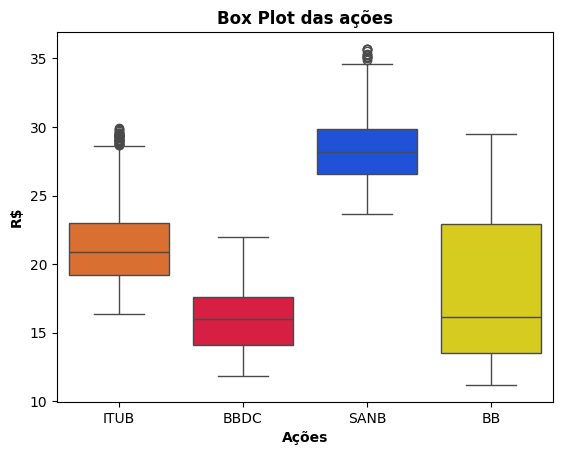

In [24]:
# Criando Box Plot para os papéis
cores=['#F56814','#F50031','#0045F5','#F5E600']
sns.boxplot(data=df,palette=cores)
plt.title('Box Plot das ações',fontweight='bold')
plt.xlabel('Ações',fontweight='bold')
plt.ylabel('R$',fontweight='bold')
plt.grid(False)
plt.show()

Durante o intervalo de tempo de 2021 até maio de 2024, o gráfico Box Plot destaca que o Banco do Brasil teve a maior variação dos preços de seus papéis, enquanto, os demais tiveram variação mais estáveis e próxima entre si.  

In [25]:
# Criando gráfico das cotações
figura = px.line(title = 'Histórico de cotações das ações')

for i, coluna in enumerate(df.columns):
    figura.add_scatter(x=df.index, y=df[coluna], name=coluna, line=dict(color=cores[i]))


figura.update_layout(
    xaxis_title='Data',
    yaxis_title='R$',
    title_x=0.5
)

figura.show()

O histórico das cotações indica que o Itaú e Banco do Brasil tiveram crescimento de seus valores de mercado, enquanto, que Santander e o Bradesco sofreram com quedas.

In [26]:
# Normalizando as cotações para melhor comparação dos retornos
df_normalizado = df.copy()
for i in df_normalizado.columns[0:]:
  df_normalizado[i] = df_normalizado[i] / df_normalizado[i][0]

/var/folders/f0/r1mlkllj4z14dx7__963964m0000gn/T/ipykernel_3232/750987407.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [27]:
# Criando gráfico das cotações normalizadas
figura = px.line(title = 'Histórico de cotações das ações (normalizado)')

for i, coluna in enumerate(df.columns):
    figura.add_scatter(x=df_normalizado.index, y=df_normalizado[coluna], name=coluna, line=dict(color=cores[i]))


figura.update_layout(
    xaxis_title='Data',
    yaxis_title='R$',
    title_x=0.5
)

figura.show()

Após a normalização, fica evidente que a maior variação da cotação do Banco do Brasil é explicada pelo seu grande crescimento comparado aos outros. Além disso, Itaú também obteve ganhos consideráveis, enquanto, Santander e Bradesco tiveram quedas. 